In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from patchify import patchify,unpatchify
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pickle
import datetime
from viz_tools import eta_animation

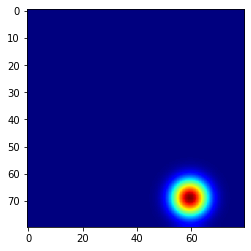

In [2]:
# Load SW eta simulation
data = np.load('eta_list.npy')# Please download the data at https://drive.google.com/file/d/1mBS4F13YE4siTMKmydBCtUMnfcMP-4GA/view?usp=sharing  
# plot an example : 
plt.imshow(data[20,:,:], cmap = 'jet')

# decompose field ipatchify(patches, patch_size, step = 1)nto a patch collection :
x_size = 20
y_size = 20
patches = []
for i in range(data.shape[0]):
    patches.append(patchify(data[i,:,:], [x_size, y_size], step = 20))
    

In [3]:
L_x = 1E+6              # Length of domain in x-direction
L_y = 1E+6              # Length of domain in y-direction
N_x = 80                            # Number of grid points in x-direction
N_y = 80                            # Number of grid points in y-direction
dx = L_x/(N_x - 1)                  # Grid spacing in x-direction
dy = L_y/(N_y - 1)  
g = 9.81                 # Acceleration of gravity [m/s^2]
H = 100                # Depth of fluid [m]
dt_real = 0.1*min(dx, dy)/np.sqrt(g*H)    # Time step (defined from the CFL condition)

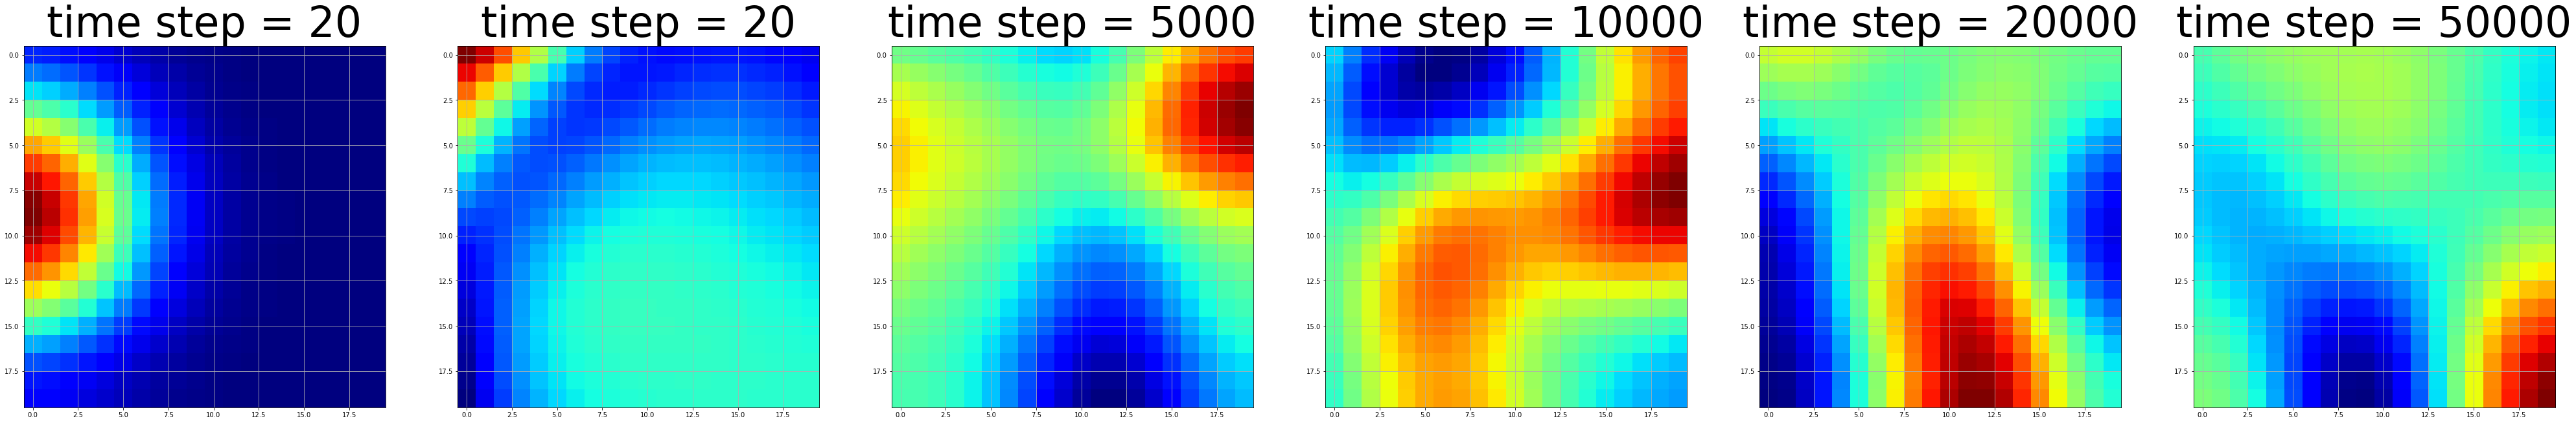

In [4]:
# plot some patches : 
title_font = 65

fig = plt.figure(figsize=(70, 70))
gs1 = fig.add_gridspec(nrows=5, ncols=6)#), left=0.05, right=0.48, wspace=0.05)
ax = fig.add_subplot(5, 6, 1)
ax.imshow(patches[20][-1,-1],cmap = 'jet')
plt.title("time step = 20",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 2)
ax.imshow(patches[500][-1,-1],cmap = 'jet')
plt.title("time step = 20",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 3)
ax.imshow(patches[5000][-1,-1],cmap = 'jet')
plt.title("time step = 5000",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 4)
ax.imshow(patches[10000][-1,-1],cmap = 'jet')
plt.title("time step = 10000",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 5)
ax.imshow(patches[20000][-1,-1],cmap = 'jet')
plt.title("time step = 20000",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 6)
ax.imshow(patches[50000][-1,-1],cmap = 'jet')
plt.title("time step = 50000",fontsize = title_font)
plt.grid()

In [5]:
# select a patch for learning (can also learn on several patches as batch)
data = np.array(patches)[:,2,2,:,:].reshape(np.array(patches).shape[0],x_size*y_size)
pca = PCA(n_components=8)
pca.fit(data)
X_train_Raw = pca.fit_transform(data)[299:]
patche_proj = pca.inverse_transform(X_train_Raw)

In [6]:
patche_proj.shape

(99700, 400)

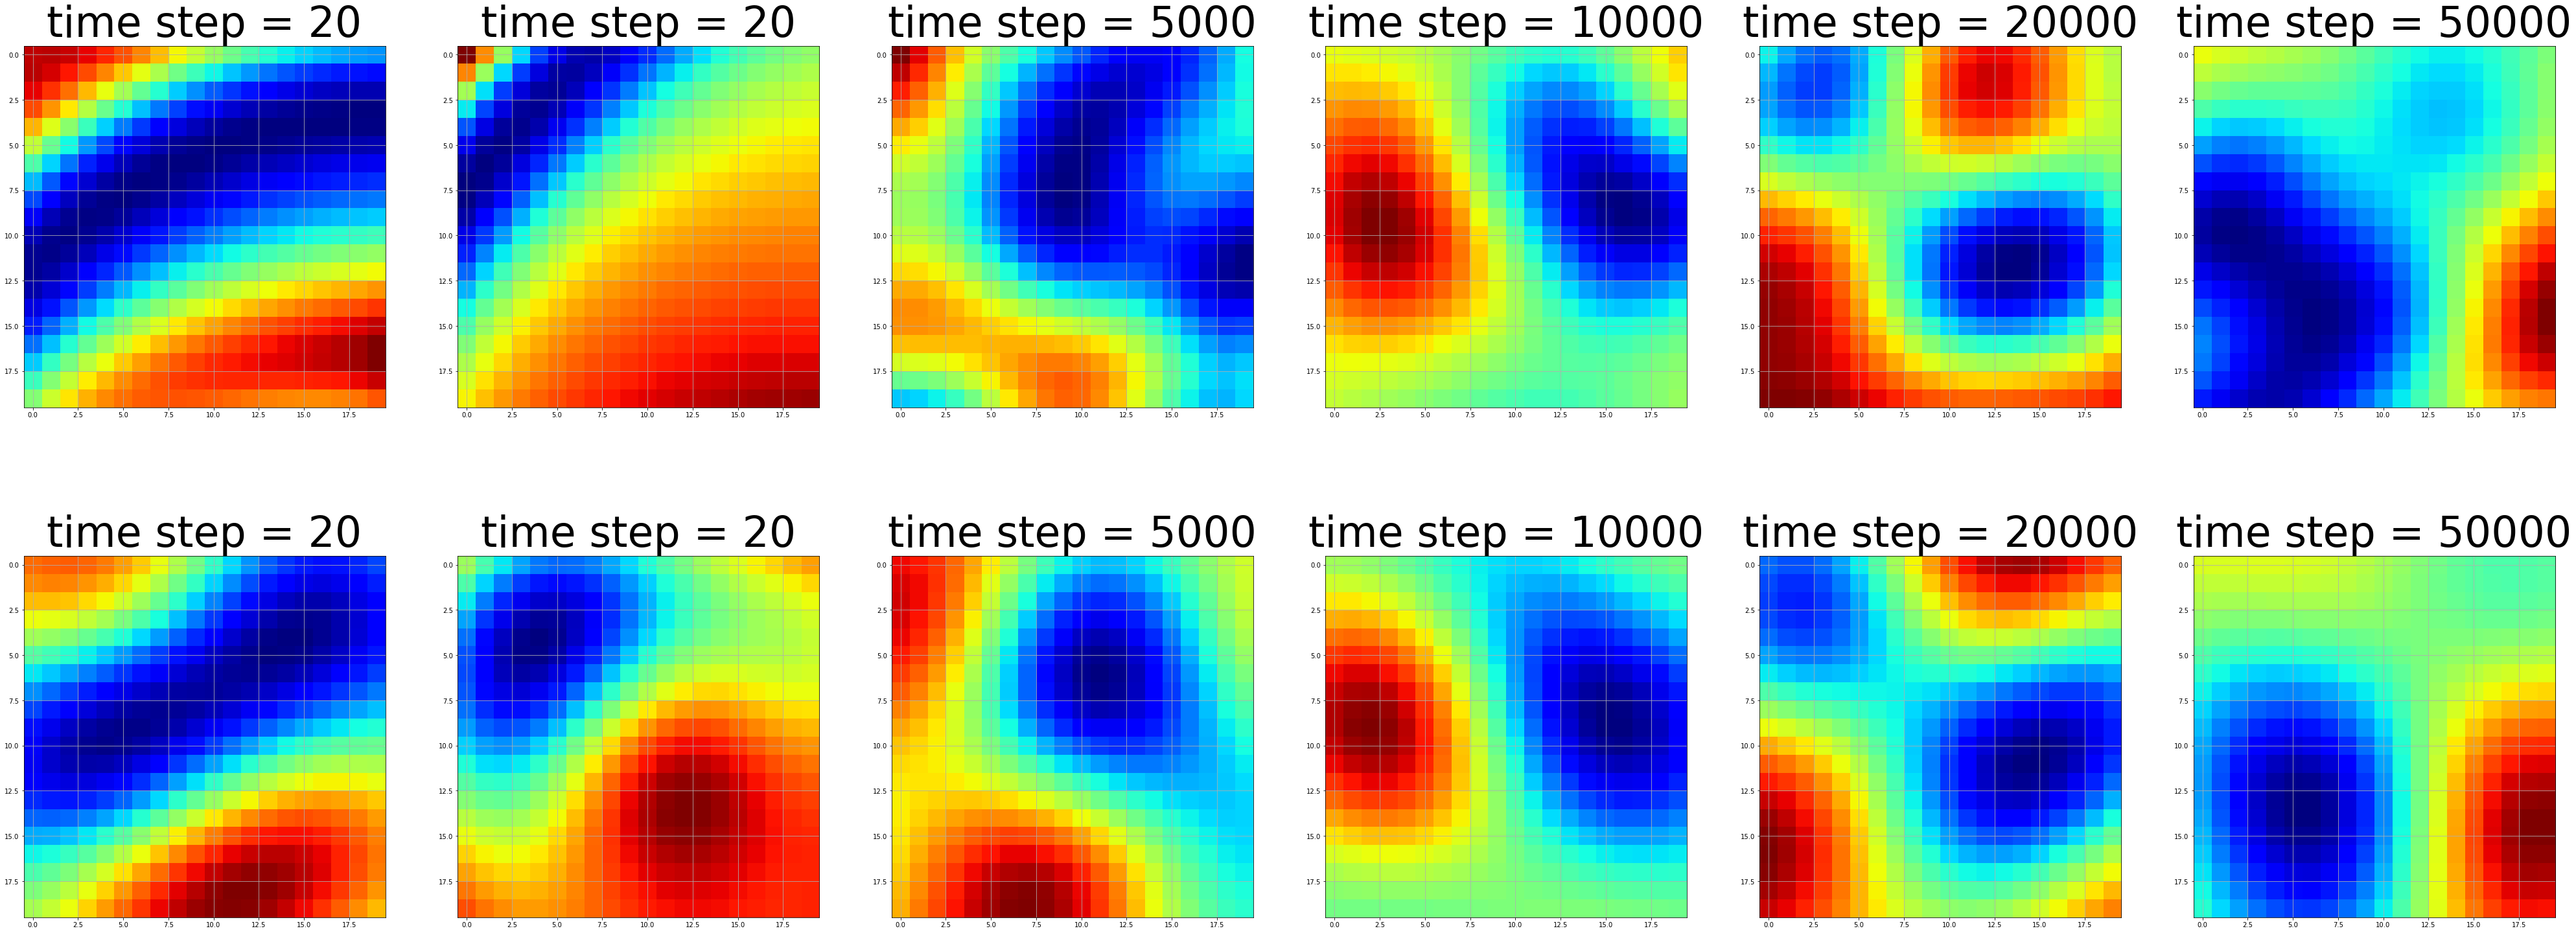

In [7]:
# plot some patches : 
title_font = 65

fig = plt.figure(figsize=(70, 70))
gs1 = fig.add_gridspec(nrows=5, ncols=6)#), left=0.05, right=0.48, wspace=0.05)
ax = fig.add_subplot(5, 6, 1)
ax.imshow(patches[299+20][2,2],cmap = 'jet')
plt.title("time step = 20",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 2)
ax.imshow(patches[299+500][2,2],cmap = 'jet')
plt.title("time step = 20",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 3)
ax.imshow(patches[299+5000][2,2],cmap = 'jet')
plt.title("time step = 5000",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 4)
ax.imshow(patches[299+10000][2,2],cmap = 'jet')
plt.title("time step = 10000",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 5)
ax.imshow(patches[299+20000][2,2],cmap = 'jet')
plt.title("time step = 20000",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 6)
ax.imshow(patches[299+50000][2,2],cmap = 'jet')
plt.title("time step = 50000",fontsize = title_font)

ax = fig.add_subplot(5, 6, 7)
ax.imshow(patche_proj[20].reshape(x_size,y_size),cmap = 'jet')
plt.title("time step = 20",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 8)
ax.imshow(patche_proj[500].reshape(x_size,y_size),cmap = 'jet')
plt.title("time step = 20",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 9)
ax.imshow(patche_proj[5000].reshape(x_size,y_size),cmap = 'jet')
plt.title("time step = 5000",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 10)
ax.imshow(patche_proj[10000].reshape(x_size,y_size),cmap = 'jet')
plt.title("time step = 10000",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 11)
ax.imshow(patche_proj[20000].reshape(x_size,y_size),cmap = 'jet')
plt.title("time step = 20000",fontsize = title_font)
plt.grid()

ax = fig.add_subplot(5, 6, 12)
ax.imshow(patche_proj[50000].reshape(x_size,y_size),cmap = 'jet')
plt.title("time step = 50000",fontsize = title_font)

plt.grid()

In [8]:
dim = 8
train_len = 50000
X_trainb = preprocessing.scale(X_train_Raw[:,:dim])
mean = np.mean(X_train_Raw[:,:dim],axis = 0)
std = np.std(X_train_Raw[:,:dim],axis = 0)
X_train = X_trainb[299:train_len,:]
X_test = X_trainb[train_len:,:]


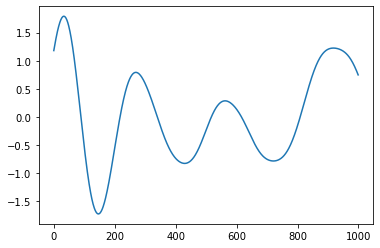

In [9]:
plt.plot(X_test[:1000,0])

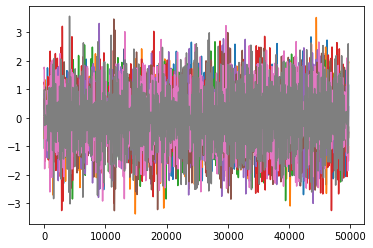

In [10]:
dim_aug = 18
dt_integration = 0.01
Grad_t   = np.gradient(X_train[:,:])[0].reshape(X_train.shape[0],dim)/dt_integration

Batch_size = X_train.shape[0]
plt.plot(X_train)

In [11]:
params = {}
params['transition_layers']=1
params['bi_linear_layers']=dim_aug
params['dim_hidden_linear'] = dim_aug
params['dim_input']=dim
params['dim_output']=dim_aug
params['dim_latent']=dim_aug-dim
params['dim_observations'] = dim_aug
params['dim_hidden']= dim_aug
params['dt_integration'] = dt_integration
params['ntrain']=[0,10000]
pretrained = False
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

In [12]:
class FC_net(torch.nn.Module):
            def __init__(self, params):
                super(FC_net, self).__init__()
                y_aug = np.random.uniform(size=(Batch_size,params['dim_latent']))
                self.y_aug = torch.nn.Parameter(data=torch.from_numpy(y_aug).float(), requires_grad=True)
                self.m = torch.nn.Parameter(torch.Tensor(params['dim_observations']))
                torch.nn.init.uniform_(self.m)
                self.linearCell     = torch.nn.Linear(params['dim_input']+params['dim_latent'], params['dim_output']) 
                self.BilinearCell   = torch.nn.Bilinear(params['dim_input']+params['dim_latent'], params['dim_input']+params['dim_latent'], params['dim_output'], bias = False)
            def forward(self, inp, dt):
                """
                In the forward function we accept a Tensor of input data and we must return
                a Tensor of output data. We can use Modules defined in the constructor as
                well as arbitrary operators on Tensors.
                """
                if inp.shape[-1]<params['dim_latent']+params['dim_input']:
                    aug_inp = torch.cat((inp, self.y_aug), dim=1)# - self.m
                else:
                    aug_inp = inp
                L_outp   = self.linearCell(aug_inp)
                BP       = self.BilinearCell(aug_inp,aug_inp)
                grad = L_outp + BP
                As = (self.linearCell.weight + torch.transpose(self.linearCell.weight,1,0))/2
                eig_vals = (torch.symeig(As,eigenvectors=True)[0])
                return grad, aug_inp, eig_vals
model  = FC_net(params)

class FC_net_shifted(torch.nn.Module):
            def __init__(self, params):
                super(FC_net_shifted, self).__init__()
                self.Dyn_net_init = model
            def forward(self, inp, dt):
                """
                In the forward function we accept a Tensor of input data and we must return
                a Tensor of output data. We can use Modules defined in the constructor as
                well as arbitrary operators on Tensors.
                """
                if inp.shape[-1]<params['dim_latent']+params['dim_input']:
                    aug_inp = torch.cat((inp, self.Dyn_net_init.y_aug), dim=1) - self.Dyn_net_init.m
                else:
                    aug_inp = inp
                d = self.Dyn_net_init.linearCell.bias + torch.nn.functional.bilinear(self.Dyn_net_init.m,self.Dyn_net_init.m,self.Dyn_net_init.BilinearCell.weight) + torch.nn.functional.linear(self.Dyn_net_init.m,self.Dyn_net_init.linearCell.weight)
                A = torch.matmul(self.Dyn_net_init.m,self.Dyn_net_init.BilinearCell.weight + self.Dyn_net_init.BilinearCell.weight.transpose(2,1)) + self.Dyn_net_init.linearCell.weight
                L_outp   = torch.nn.functional.linear(aug_inp,A,d)
                BP       = self.Dyn_net_init.BilinearCell(aug_inp,aug_inp)
                grad = L_outp + BP
                As = (A + torch.transpose(A,1,0))/2
                eig_vals = (torch.symeig(As,eigenvectors=True)[0])
                return grad, aug_inp, eig_vals, A, d
model_shifted  = FC_net_shifted(params)

class INT_net(torch.nn.Module):
            def __init__(self, params):
                super(INT_net, self).__init__()
                self.Dyn_net = model_shifted.Dyn_net_init
            def forward(self, inp, dt):
                """
                In the forward function we accept a Tensor of input data and we must return
                a Tensor of output data. We can use Modules defined in the constructor as
                well as arbitrary operators on Tensors.
                """

                if inp.shape[-1]<params['dim_latent']+params['dim_input']:
                    k1, aug_inp, eig_vals   = self.Dyn_net(inp,dt)
                    inp_k2 = 0.5*params['dt_integration']*k1
                    inp_k2[:,:] = aug_inp + 0.5*params['dt_integration']*k1[:,:]
                    k2, tmp, tmpp   = self.Dyn_net(inp_k2,dt)
                    inp_k3 = 0.5*params['dt_integration']*k2
                    inp_k3[:,:] = aug_inp + 0.5*params['dt_integration']*k2[:,:]            
                    k3, tmp, tmpp   = self.Dyn_net(inp_k3,dt)
                    inp_k4 = params['dt_integration']*k3
                    inp_k4[:,:] = aug_inp + params['dt_integration']*k3[:,:]            
                    k4, tmp, tmpp   = self.Dyn_net(inp_k4,dt)            
                    pred = aug_inp +dt*(k1+2*k2+2*k3+k4)/6
                else : 
                    k1, aug_inp, eig_vals   = self.Dyn_net(inp,dt)
                    inp_k2 = 0.5*params['dt_integration']*k1
                    inp_k2[:,:] = inp + 0.5*params['dt_integration']*k1
                    k2, tmp, tmpp   = self.Dyn_net(inp_k2,dt)
                    inp_k3 = 0.5*params['dt_integration']*k2
                    inp_k3[:,:] = inp + 0.5*params['dt_integration']*k2       
                    k3, tmp, tmpp   = self.Dyn_net(inp_k3,dt)
                    inp_k4 = params['dt_integration']*k3
                    inp_k4[:,:] = inp + params['dt_integration']*k3          
                    k4, tmp, tmpp   = self.Dyn_net(inp_k4,dt)            
                    pred = aug_inp +dt*(k1+2*k2+2*k3+k4)/6    

                return pred, k1, inp, aug_inp, eig_vals
class INT_net_shifted(torch.nn.Module):
            def __init__(self, params):
                super(INT_net_shifted, self).__init__()
                self.Dyn_net = model_shifted
            def forward(self, inp, dt):
                if inp.shape[-1]<params['dim_latent']+params['dim_input']:
                    k1, aug_inp, eig_vals, A, d  = self.Dyn_net(inp,dt)
                    inp_k2 = 0.5*params['dt_integration']*k1
                    inp_k2[:,:] = aug_inp + 0.5*params['dt_integration']*k1[:,:]
                    k2, tmp, tmpp, A, d   = self.Dyn_net(inp_k2,dt)
                    inp_k3 = 0.5*params['dt_integration']*k2
                    inp_k3[:,:] = aug_inp + 0.5*params['dt_integration']*k2[:,:]            
                    k3, tmp, tmpp, A, d   = self.Dyn_net(inp_k3,dt)
                    inp_k4 = params['dt_integration']*k3
                    inp_k4[:,:] = aug_inp + params['dt_integration']*k3[:,:]            
                    k4, tmp, tmpp, A, d   = self.Dyn_net(inp_k4,dt)            
                    pred = aug_inp +dt*(k1+2*k2+2*k3+k4)/6
                else :
                    k1, aug_inp, eig_vals, A, d   = self.Dyn_net(inp,dt)
                    inp_k2 = 0.5*params['dt_integration']*k1
                    inp_k2[:,:] = inp + 0.5*params['dt_integration']*k1
                    k2, tmp, tmpp, A, d   = self.Dyn_net(inp_k2,dt)
                    inp_k3 = 0.5*params['dt_integration']*k2
                    inp_k3[:,:] = inp + 0.5*params['dt_integration']*k2       
                    k3, tmp, tmpp, A, d   = self.Dyn_net(inp_k3,dt)
                    inp_k4 = params['dt_integration']*k3
                    inp_k4[:,:] = inp + params['dt_integration']*k3          
                    k4, tmp, tmpp, A, d   = self.Dyn_net(inp_k4,dt)            
                    pred = aug_inp +dt*(k1+2*k2+2*k3+k4)/6    

                return pred, k1, inp, aug_inp, eig_vals, A, d

dt = params['dt_integration']
aug_vect = []
x = (torch.from_numpy(X_train).float())
z = (torch.from_numpy(Grad_t).float())

In [13]:
modelRINN = INT_net(params)
modelRINN_shifted = INT_net_shifted(params)
criterion = torch.nn.MSELoss(reduction='none')
optimizer = torch.optim.Adam(modelRINN_shifted.parameters(),lr = 0.1)

In [14]:
output_file_name = 'PB_SW_seed_'+str(seed)
if pretrained :
    modelRINN_shifted.load_state_dict(torch.load(output_file_name+'.pt'))

for param_group in optimizer.param_groups:
    print(param_group['lr'])

for param_group in optimizer.param_groups:
    param_group['lr'] = .001

0.1


In [15]:
t = 0
while True:
            # Forward pass: Compute predicted y by passing x to the model
            pred, grad, inp, aug_inp, eig_vals, A, d = modelRINN_shifted(x,dt)
            l1_reg = 0.
            for name, W in modelRINN_shifted.named_parameters():
                if name == 'Dyn_net.Dyn_net_init.BilinearCell.weight':
                    for i in range(W.shape[0]):
                        for j in range(W.shape[0]):
                            for k in range(W.shape[0]):
                                l1_reg = l1_reg + torch.norm((W[i,j,k] + \
                                 W[i,k,j] + \
                                 W[j,i,k] + \
                                 W[j,k,i] + \
                                 W[k,i,j] + \
                                 W[k,j,i]))
            # Compute and print loss
            loss1 = criterion(grad[:,:dim], z).mean()
            loss2 = criterion(pred[:-1,:] , aug_inp[1:,:]).sum()
            loss3 = torch.sum(torch.relu(eig_vals)/(torch.relu(eig_vals)+1))
            loss =  1*loss1+0.001*loss2 + 1*(l1_reg)+ 1000*loss3
            
            # Zero gradients, perform a backward pass, and update the weights.
            optimizer.zero_grad()
            loss.backward(retain_graph=True)
            optimizer.step()
            torch.save(modelRINN_shifted.state_dict(), output_file_name+'.pt')
            if loss.data.numpy()<5.5:
                break
            if t %1000 ==0:
                print('error', loss)
            t+=1

/homes/s17ouala/miniconda3/envs/DYN_ID2/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272126608/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:2499.)


error tensor(5442.0889, grad_fn=<AddBackward0>)
error tensor(19.7090, grad_fn=<AddBackward0>)
error tensor(10.9152, grad_fn=<AddBackward0>)
error tensor(9.9898, grad_fn=<AddBackward0>)
error tensor(8.3274, grad_fn=<AddBackward0>)
error tensor(6.6391, grad_fn=<AddBackward0>)
error tensor(5.9385, grad_fn=<AddBackward0>)


In [16]:
#torch.save(modelRINN_shifted.state_dict(), output_file_name+'.pt')
pred, grad, inp, aug_inp, eig_vals, A, d = modelRINN_shifted(x,dt)
y_pred2=np.zeros((10000,dim_aug))
tmp = aug_inp[-1:,:].clone()
tmp[:,:] = tmp[:,:]#*0 +150
y_pred2[0,:] = tmp.cpu().data.numpy()
for i in range(0,10000-1):
    y_pred2[i,:] = modelRINN_shifted(tmp,0.01)[0].cpu().data.numpy()
    tmp = (torch.from_numpy(np.reshape(y_pred2[i,:],(1,dim_aug))).float())
y_pred2 = y_pred2 + modelRINN_shifted.Dyn_net.Dyn_net_init.m.detach().data.numpy()

In [17]:
y_pred_out=np.zeros((10000,dim_aug))
tmp = aug_inp[-1:,:].clone()
tmp[:,:] = tmp[:,:]*0 + 20
y_pred_out[0,:] = tmp.cpu().data.numpy()
for i in range(0,10000-1):
    y_pred_out[i,:] = modelRINN_shifted(tmp,0.01)[0].cpu().data.numpy()
    tmp = (torch.from_numpy(np.reshape(y_pred_out[i,:],(1,dim_aug))).float())
y_pred_out = y_pred_out + modelRINN_shifted.Dyn_net.Dyn_net_init.m.detach().data.numpy()    
print(y_pred_out[-1,:])

[ 0.60067981  0.69260955  0.11127759  0.17329419  0.31656119  0.60352421
  0.42928693  0.82123899  0.43208176  0.66120291  0.37619635  0.41487187
 -0.02118391  0.23647058  0.34927145  0.48672283  0.68841094  0.80223298]


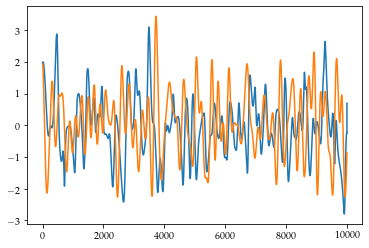

In [28]:
plt.plot(y_pred2[:10000,0])
plt.plot(X_test[:10000,0])

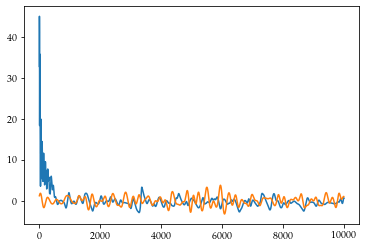

In [29]:
plt.plot(y_pred_out[:10000,0])
plt.plot(X_test[:10000,0])

In [20]:
X_test_unorm = X_test*std+mean
y_pred2_unorm = y_pred2[:,:dim]*std+mean

from scipy.fftpack import fft
# Number of sample points
end_seq = 10000-1
N = end_seq
# sample spacing
T =  0.01
Y1, Y2 = [], []
for i in range(dim):
    y2 = y_pred2_unorm[1000:1000+end_seq,i]# compute the spectrums without the transient
    yf2 = fft(y2)
    yf2_abs  = 2.0/N * np.abs(yf2[1:N//2])
    Y2.append(yf2_abs)
Y2 = np.array(Y2)
#spectrum of the true series
for i in range(dim):
    y = X_test_unorm[:end_seq,i]
    yf = fft(y)
    yf_abs = 2.0/N * np.abs(yf[1:N//2])
    Y1.append(yf_abs)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
Y1 = np.array(Y1)

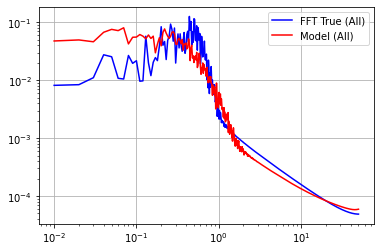

In [21]:
end_plt = -1
plt.loglog(xf[1:N//2][:end_plt], np.array(Y1)[:20,:].mean(axis = 0)[:end_plt], '-b')
plt.loglog(xf[1:N//2][:end_plt], np.array(Y2)[:20,:].mean(axis = 0)[:end_plt], '-r')

plt.legend(['FFT True (All)', 'Model (All)'])
plt.grid()
plt.show()

In [22]:
forecasted_series = pca.inverse_transform(y_pred2[:,:dim]*std+mean).reshape(-1,20,20)
Projection        = pca.inverse_transform(X_test*std+mean).reshape(-1,20,20)
True_State        = np.array(patches)[(299+train_len):,2,2,:,:]

In [23]:
forecasted_series.shape

(10000, 20, 20)

In [24]:
# plot some patches : 
title_font = 280
idx0 = 1
idx1 = 20
idx2 = 40
idx3 = 4000
idx4 = 8000

import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    cbar.ax.tick_params(labelsize=170)
    plt.sca(last_axes)
    return cbar
extent = [dx*40/1000, dx*60/1000, dy*20/1000, dy*40/1000]
vmin_ = -0.1
vmax_ = 0.15
idx_seed = 1
fig = plt.figure(figsize=(200, 200))
gs1 = fig.add_gridspec(nrows=2, ncols=5)#), left=0.05, right=0.48, wspace=0.05)
ax = fig.add_subplot(3, 5, 1)
ax.tick_params(axis='both', which='major', labelsize=title_font)
ax.imshow(True_State[idx0],cmap = plt.cm.RdBu_r,extent = extent,vmin = vmin_, vmax = vmax_)
str_time = " Time : "+str(str(datetime.timedelta(seconds=(idx0+1)*dt_real))[:-4])
ax.set_xlabel(str_time+"\nx[km]",fontsize = title_font,labelpad = 20)#set_xlabel(" x[km] ",fontsize = title_font,labelpad = 20)#+str(str(datetime.timedelta(seconds=(idx0+1)*dt_real))[:-4]),fontsize = title_font)
ax.xaxis.set_label_position('top') 
ax.set_ylabel("True State\ny[km]",fontsize = title_font,labelpad = 20)#+str(str(datetime.timedelta(seconds=(idx0+1)*dt_real))[:-4]),fontsize = title_font)
#ax.set_title(,fontsize = title_font, pad=100)

ax = fig.add_subplot(3, 5, 2)
ax.imshow(True_State[idx1],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.set_title(" Time : \n"+str(str(datetime.timedelta(seconds=(idx1+1)*dt_real))[:-4]),fontsize = title_font, pad=100)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 3)
ax.imshow(True_State[idx2],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.set_title(" Time : \n"+str(str(datetime.timedelta(seconds=(idx2+1)*dt_real))[:-4]),fontsize = title_font, pad=100)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 4)
ax.imshow(True_State[idx3],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.set_title(" Time : \n"+str(str(datetime.timedelta(seconds=(idx3+1)*dt_real))[:-4]),fontsize = title_font, pad=100)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 5)
ax.imshow(True_State[idx4],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax =vmax_)
ax.set_title(" Time : \n"+str(str(datetime.timedelta(seconds=(idx4+1)*dt_real))[:-4]),fontsize = title_font, pad=100)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 6)
ax.imshow(Projection[idx0,:,:],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.set_ylabel("Projection",fontsize = title_font,labelpad = 20)#+str(str(datetime.timedelta(seconds=(idx0+1)*dt_real))[:-4]),fontsize = title_font)
ax.set_yticks([])
ax.set_xticks([])


ax = fig.add_subplot(3, 5, 7)
ax.imshow(Projection[idx1,:,:],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 8)
ax.imshow(Projection[idx2,:,:],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 9)
ax.imshow(Projection[idx3,:,:],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 10)
ax.imshow(Projection[idx4,:,:],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax =vmax_)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 11)
ax.imshow(forecasted_series[idx0,:,:],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.set_ylabel("Constrained \nNbedDYn",fontsize = title_font,labelpad = 20)#+str(str(datetime.timedelta(seconds=(idx0+1)*dt_real))[:-4]),fontsize = title_font)
ax.set_yticks([])
ax.set_xticks([])

ax = fig.add_subplot(3, 5, 12)
ax.imshow(forecasted_series[idx1,:,:],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 13)
ax.imshow(forecasted_series[idx2,:,:],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 14)
ax.imshow(forecasted_series[idx3,:,:],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax = fig.add_subplot(3, 5, 15)
im = ax.imshow(forecasted_series[idx4,:,:],cmap = plt.cm.RdBu_r,vmin = vmin_, vmax = vmax_)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
colorbar(im)

#plt.savefig('SWE_Forecasted_patchs_Const_NbedDyn_bis.pdf')
#plt.savefig('SWE_Forecasted_patchs_Const_NbedDyn_bis.svg')
#plt.savefig('SWE_Forecasted_patchs_Const_NbedDyn_bis.png')